## Post-Clustering Validity
Once we perform clustering, we need to verify that we obtained the correct number of clusters.
In this project, we explored Partition Coefficient, Classification Entropy and CS indices as validation methods.
When we perform fuzzy-c-means, we obtain a membership matrix, U. This matrix contains the probabilities of each data point belonging to each cluster. 
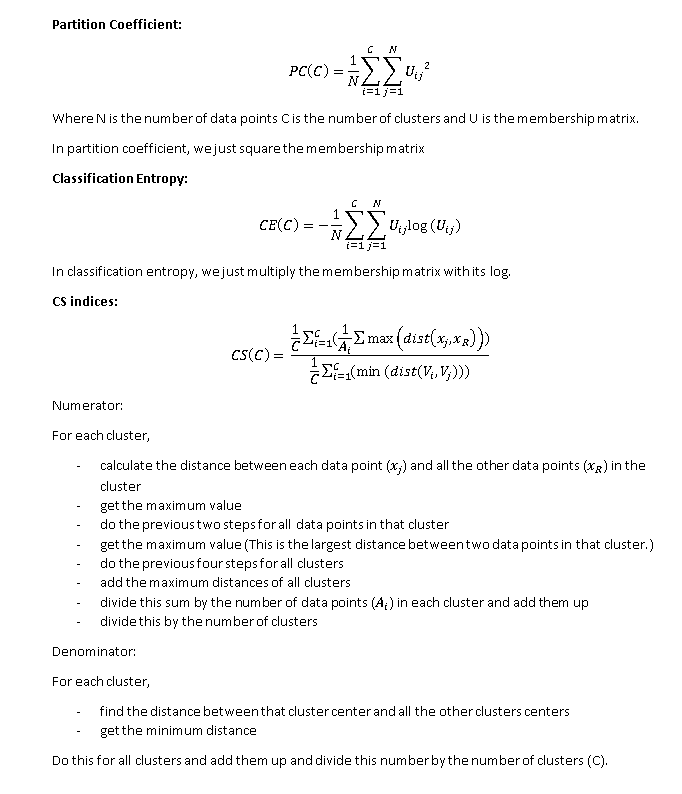
We developed 2 to 10 clusters with fuzzy-c-means then applied these three techniques to see what number of clusters is the most suitable one. 

For pre-clustering assessment, we will use the following vat() and ivat() functions which can be found in pyclustertend library.

In [1]:

import numpy as np
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

def vat(data, return_odm=False, figure_size=(10, 10)):
    """VAT means Visual assesement of tendency. basically, it allow to asses cluster tendency
    through a map based on the dissimiliraty matrix.


    Parameters
    ----------

    data : matrix
        numpy array

    return_odm : return the Ordered Dissimalirity Matrix
        boolean (default to False)

    figure_size : size of the VAT.
        tuple (default to (10,10))


    Return
    -------

    ODM : matrix
        the ordered dissimalarity matrix plotted.

    """

    ordered_dissimilarity_matrix = compute_ordered_dissimilarity_matrix(data)

    _, ax = plt.subplots(figsize=figure_size)
    ax.imshow(ordered_dissimilarity_matrix, cmap='gray', vmin=0, vmax=np.max(ordered_dissimilarity_matrix))

    if return_odm is True:
        return ordered_dissimilarity_matrix



def compute_ordered_dissimilarity_matrix(X):
    """The ordered dissimilarity matrix is used by visual assesement of tendency. It is a just a a reordering
    of the dissimilarity matrix.


    Parameters
    ----------

    X : matrix
        numpy array

    Return
    -------

    ODM : matrix
        the ordered dissimalarity matrix .

    """

    # Step 1 :

    observation_path = []

    matrix_of_pairwise_distance = pairwise_distances(X)
    list_of_int = np.zeros(matrix_of_pairwise_distance.shape[0], dtype="int")

    index_of_maximum_value = np.argmax(matrix_of_pairwise_distance)

    column_index_of_maximum_value = index_of_maximum_value // matrix_of_pairwise_distance.shape[1]

    list_of_int[0] = column_index_of_maximum_value
    observation_path.append(column_index_of_maximum_value)

    K = np.linspace(0, matrix_of_pairwise_distance.shape[0] - 1, matrix_of_pairwise_distance.shape[0], dtype="int")
    J = np.delete(K, column_index_of_maximum_value)

    # Step 2 :

    for r in range(1, matrix_of_pairwise_distance.shape[0]):

        p, q = (-1, -1)

        mini = np.max(matrix_of_pairwise_distance)

        for candidate_p in observation_path:
            for candidate_j in J:
                if matrix_of_pairwise_distance[candidate_p, candidate_j] < mini:
                    p = candidate_p
                    q = candidate_j
                    mini = matrix_of_pairwise_distance[p, q]

        list_of_int[r] = q
        observation_path.append(q)

        ind_q = np.where(np.array(J) == q)[0][0]
        J = np.delete(J, ind_q)

    # Step 3

    ordered_matrix = np.zeros(matrix_of_pairwise_distance.shape)

    for column_index_of_maximum_value in range(ordered_matrix.shape[0]):
        for j in range(ordered_matrix.shape[1]):
            ordered_matrix[column_index_of_maximum_value, j] = matrix_of_pairwise_distance[
                list_of_int[column_index_of_maximum_value], list_of_int[j]]

    # Step 4 :

    return ordered_matrix




def ivat(data, return_odm=False, figure_size=(10, 10)):
    """iVat return a visualisation based on the Vat but more reliable and easier to
    interpret.


    Parameters
    ----------

    data : matrix
        numpy array

    return_odm : return the Ordered Dissimalirity Matrix
            boolean (default to False)

    figure_size : size of the VAT.
        tuple (default to (10,10))


    Return
    -------

    D_prim : matrix
        the ivat ordered dissimalarity matrix.

    """

    ordered_matrix = compute_ivat_ordered_dissimilarity_matrix(data)

    _, ax = plt.subplots(figsize=figure_size)
    ax.imshow(ordered_matrix, cmap='gray', vmin=0, vmax=np.max(ordered_matrix))

    if return_odm is True:
        return ordered_matrix




def compute_ivat_ordered_dissimilarity_matrix(X):
    """The ordered dissimilarity matrix is used by ivat. It is a just a a reordering
    of the dissimilarity matrix.


    Parameters
    ----------

    X : matrix
        numpy array

    Return
    -------

    D_prim : matrix
        the ordered dissimalarity matrix .

    """

    ordered_matrix = compute_ordered_dissimilarity_matrix(X)
    re_ordered_matrix = np.zeros((ordered_matrix.shape[0], ordered_matrix.shape[0]))

    for r in range(1, ordered_matrix.shape[0]):
        # Step 1 : find j for which D[r,j] is minimum and j in [1:r-1]

        j = np.argmin(ordered_matrix[r, 0:r])

        # Step 2 :

        re_ordered_matrix[r, j] = ordered_matrix[r, j]

        # Step 3 : pour c : 1,r-1 avec c !=j
        c_tab = np.array(range(0, r))
        c_tab = c_tab[c_tab != j]

        for c in c_tab:
            re_ordered_matrix[r, c] = max(ordered_matrix[r, j], re_ordered_matrix[j, c])
            re_ordered_matrix[c, r] = re_ordered_matrix[r, c]

    return re_ordered_matrix


In [2]:
#import necessary libraries:
import glob
import pandas as pd
import numpy as np
import skimage.io
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from fcmeans import FCM
# absolute path to search all PMG files inside a specific folder
path = r'*.PGM'
files = glob.glob(path)

C:\Users\h\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
files

['4cov.PGM',
 'No_Clust.PGM',
 'No_Clust_nois_pt_01.PGM',
 'Three_Close_Clust.PGM',
 'Three_Close_Clust_nois_pt005.PGM',
 'Two_Clus_Diff_Density.PGM',
 'Two_Clus_Diff_Size.PGM',
 'Two_Ellip_Diff_Density.PGM',
 'Two_Ellip_Diff_Size.PGM',
 'Two_Separat_Clust.PGM',
 'Two_Separat_Clust_nois_pt005.PGM']

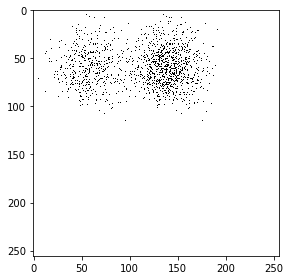

In [4]:
#Show one of the images
skimage.io.imshow("Two_Clus_Diff_Density.PGM", cmap='gray')

The image has black dots on a white background. Black dots are going to be investigated by the algorithm, so, we need to create an array where black dots have the value of 1 and white pixels have the value of 0 as they are irrelevant. Then, we will apply ivat() function to the obtained array.

The fuzzy algorithm requires data points' locations. The following function detects the data points' coordinates in the image (dataset) and returns them as an array.

In [5]:
def extract_points(im):
    
    X = []

    for i in range(len(im)):
        for j in range(len(im[i])):
            if im[i][j]==1:
                X.append([j,i])
    return np.array(X)
    

The following function applies fuzzy c means algorithm to the data points and returns the membership matrix, cluster centers' locations, and cluster labels for each data point.

In [6]:
def apply_fcm(X):
    mem_mat = []
    clus_centers = []
    clus_labels = []
    for n_clusters in range(2, 11):
        my_model = FCM(n_clusters=n_clusters) 
        my_model.fit(X) 
        u = my_model.u
        centers = my_model.centers
        labels = my_model.predict(X)
        mem_mat.append(u)
        clus_centers.append(centers)
        clus_labels.append(labels)
    return mem_mat, clus_centers, clus_labels
       

The following function finds the distance between two points.

In [7]:
def distance(data, center):
    return np.sqrt((data[0]-center[0])**2+(data[1]-center[1])**2)

### Partition Coefficient:
The following function takes in a membership matrix, takes the square of it, adds up the values and divide it by the number of data points.

In [8]:
def pc(mem_mat):
    n, c = mem_mat.shape
    return np.square(mem_mat).sum()/n

### Classification Entropy:
The following function takes in a membership matrix, multiplies it with its log, adds all values up and divides this number by the number of data points.

In [9]:
def ce(u):
    n, c = u.shape
    return abs((np.log10(u)*u).sum()/n)

### CS Indices:
The following function takes in data points' locations, cluster centers, and each data point's labels.
For each cluster, calculates the distance between each data point (x_i) and the rest of the data points in that cluster (x_R), gets the maximum value, does this for all data points in that cluster and gets the final maximum distance of the cluster.
It performs this for all clusters and adds the results up. Divides this number by the number of data points in each cluster and adds the results up. Finally, it divides this by the number of clusters (C). This is the numerator of the formula.
For each cluster, finds the distance between that cluster center and all the other clusters centers, gets the minimum distance.
Does this for all clusters and adds them up and divides this number by the number of clusters (C). This is the denominator of the formula.
For all cluster cases, the function divides numerator by the denominator. 


In [10]:
def cs(X, centers, labels):
    #Create dictionary to hold all CS indices for different number of clusters
    cs_per_clust = {}
    #Iterate over cluster numbers 2 to 10
    for clust_num in range(2,11):
        #Create dictionary to hold data points belonging to each cluster
        save_points = {}
        #Get the label corresponding to the current cluster number
        label = labels[clust_num-2]
        #Get the cluster centers corresponding to the current cluster number
        center = centers[clust_num-2]
        #Initialize the dictionary with keys corresponding to the number of clusters
        for i in range(np.max(label)+1):
            save_points[i] = []
        #Save data points belonging to each cluster in save_points
        for i in range(len(X)):
            save_points[label[i]].append(X[i])
        
        #Save max distance of each cluster in max_dist_clust
        max_dist_clust = []

        #For each cluster find the maximum distance between the points
        for i in range(clust_num):
            #Create a list to hold all max distances btw points in each cluster 
            save_dist_all_data = []
            #Get current cluster's data points
            cluster_points = save_points[i]
            #Calculate the distances btw data points in the current cluster
            for j in range(len(cluster_points)):
                current_data_distance = []
                for k in range(len(cluster_points)):
                    if j != k:
                        current_data_distance.append(distance(cluster_points[j], cluster_points[k]))
                    
                save_dist_all_data.append(np.max(current_data_distance))
            
            max_dist_clust.append(np.max(save_dist_all_data))
        #Add all clusters' maximum distances up    
        sum_dist_clusters = np.sum(max_dist_clust)
        
        sum_a = 0
        for a in range(clust_num):
            sum_a = sum_a + (1/len(save_points[a]))*sum_dist_clusters
        numerator = sum_a/clust_num

        #Calculate distances between cluster centers:
        #Create a list to hold distances btw clusters
        distance_btw_clusters = []
        #For each cluster calculate it's distance to all others and save it in find_dist
        for j in range(clust_num):
            find_dist = []
            for i in range(clust_num):
                if i != j:
                    find_dist.append(distance(center[j], center[i]))
                    
            #For each cluster, save it's distance to the closest cluster 
            distance_btw_clusters.append(np.min(find_dist))
        #Add closest distance of all clusters and divide it by the number of clusters
        denominator = np.sum(distance_btw_clusters)/clust_num
        #For each cluster number (c), save cs index which is numerator/denominator 
        cs_per_clust[clust_num] = numerator/denominator
    return cs_per_clust

### Image 1:

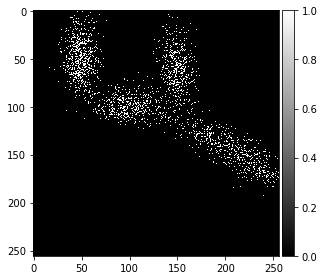

In [11]:
im1 = skimage.io.imread(files[0])
im1 = np.where(im1==255, 0, 1)
skimage.io.imshow(im1, cmap='gray')


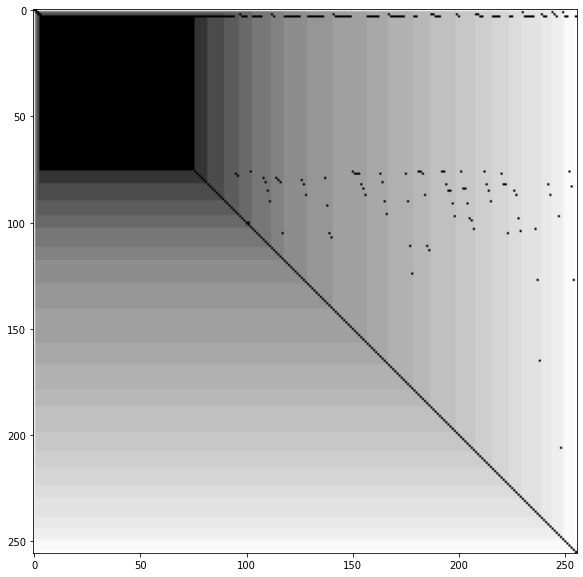

In [12]:
ivat(im1)

In the image, all data points look like one big cluster. So, the map shows one dominant black square. However, we can also see the 4 groups in the map represented by the squares a little bigger than the black square. The colors start fading after the first 4 squares.

In [13]:
#Extract the coordinates of the data points 
X = extract_points(im1)

In [14]:
#Apply fuzzy-c-means and get the membership matrix, centers of clusters and labels of each data point
u, centers, labels = apply_fcm(X)
print("Membership matrix for two clusters:")
u[0]

Membership matrix for two clusters:


array([[0.11925866, 0.88074134],
       [0.11699707, 0.88300293],
       [0.11287314, 0.88712686],
       ...,
       [0.90842159, 0.09157841],
       [0.88244139, 0.11755861],
       [0.87398087, 0.12601913]])

In [15]:
print("Partition Coefficient")
pc_values = []
for i in range(2,11):
    print(f"Partition coefficient with {i} number of clusters is: {pc(u[i-2])}")
    pc_values.append(pc(u[i-2]))
    
#The best cluster is the one that gives the highest PC.
index = pc_values.index([np.max(pc_values)])
print("Best number of clusters is {}".format(index+2))

Partition Coefficient
Partition coefficient with 2 number of clusters is: 0.7829213431779348
Partition coefficient with 3 number of clusters is: 0.7610397855115253
Partition coefficient with 4 number of clusters is: 0.7459137322794018
Partition coefficient with 5 number of clusters is: 0.715924199347179
Partition coefficient with 6 number of clusters is: 0.6661780229137693
Partition coefficient with 7 number of clusters is: 0.6391674472789495
Partition coefficient with 8 number of clusters is: 0.6150108453997531
Partition coefficient with 9 number of clusters is: 0.5986615011228452
Partition coefficient with 10 number of clusters is: 0.5757720387637478
Best number of clusters is 2


In [16]:
print("Classification Entropy:")
ce_values = []
for i in range(2,11):
    print(f"Partition coefficient with {i} number of clusters is: {ce(u[i-2])}")
    ce_values.append(ce(u[i-2]))
#The best cluster is the one that gives the lowest CE
index = ce_values.index([np.min(ce_values)])
print("Best number of clusters is {}".format(index+2))

Classification Entropy:
Partition coefficient with 2 number of clusters is: 0.15143238736213438
Partition coefficient with 3 number of clusters is: 0.19197762232826715
Partition coefficient with 4 number of clusters is: 0.22268736656298277
Partition coefficient with 5 number of clusters is: 0.25786236710216737
Partition coefficient with 6 number of clusters is: 0.30761493410168633
Partition coefficient with 7 number of clusters is: 0.33438747008703046
Partition coefficient with 8 number of clusters is: 0.3642349282596056
Partition coefficient with 9 number of clusters is: 0.38364749924981045
Partition coefficient with 10 number of clusters is: 0.4120049456234042
Best number of clusters is 2


In [17]:
cs_per_clust = cs(X, centers, labels)
print("CS indices:")
for key,value in cs_per_clust.items():
    print(f"Partition coefficient with {key} number of clusters is: {value}")
#The best cluster is the one that gives the lowest CS indices.
print(f"Best number of clusters is {min(cs_per_clust, key=cs_per_clust.get)}")

CS indices:
Partition coefficient with 2 number of clusters is: 0.002559817352729796
Partition coefficient with 3 number of clusters is: 0.0057702639358877825
Partition coefficient with 4 number of clusters is: 0.011231936437931416
Partition coefficient with 5 number of clusters is: 0.018152125828395756
Partition coefficient with 6 number of clusters is: 0.02795519427000447
Partition coefficient with 7 number of clusters is: 0.03830954885996866
Partition coefficient with 8 number of clusters is: 0.05446930949945212
Partition coefficient with 9 number of clusters is: 0.07393311419333186
Partition coefficient with 10 number of clusters is: 0.09476945489524218
Best number of clusters is 2


With all three techniques, the most suitable number of clusters for this dataset is 2.

### Image 2:

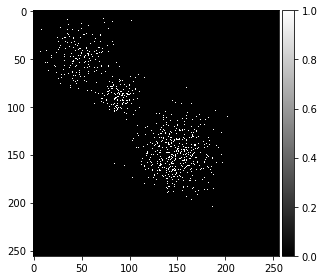

In [18]:
im2 = skimage.io.imread(files[3])
im2 = np.where(im2==255, 0, 1)
skimage.io.imshow(im2, cmap='gray')

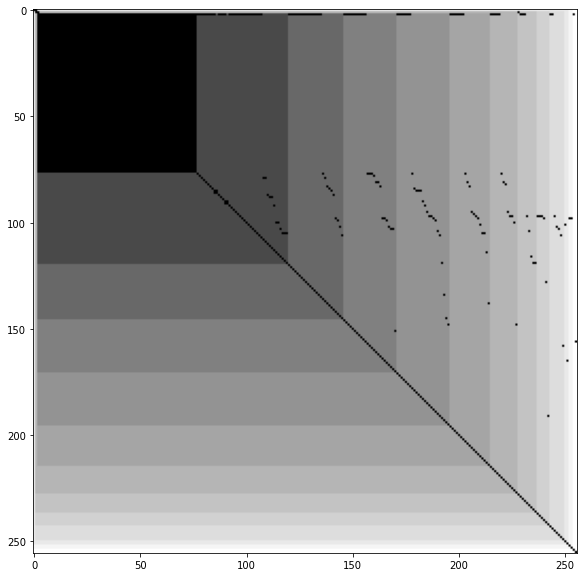

In [19]:
ivat(im2)

In [20]:
X = extract_points(im2)

In [21]:
#Apply fuzzy-c-means and get the membership matrix, centers of clusters and labels of each data point
u, centers, labels = apply_fcm(X)
print("Membership matrix for two clusters:")
print(u[0])


Membership matrix for two clusters:
[[0.14291198 0.85708802]
 [0.10840284 0.89159716]
 [0.10470202 0.89529798]
 ...
 [0.92384003 0.07615997]
 [0.91595531 0.08404469]
 [0.88680061 0.11319939]]


In [22]:
print("Partition Coefficient")
pc_values = []
for i in range(2,11):
    print(f"Partition coefficient with {i} number of clusters is: {pc(u[i-2])}")
    pc_values.append(pc(u[i-2]))
    
#The best cluster is the one that gives the highest PC.
index = pc_values.index([np.max(pc_values)])
print("Best number of clusters is {}".format(index+2))

Partition Coefficient
Partition coefficient with 2 number of clusters is: 0.8775784124235708
Partition coefficient with 3 number of clusters is: 0.8003521079332812
Partition coefficient with 4 number of clusters is: 0.6802673893552661
Partition coefficient with 5 number of clusters is: 0.6366528926291771
Partition coefficient with 6 number of clusters is: 0.5881913495943119
Partition coefficient with 7 number of clusters is: 0.547638804468625
Partition coefficient with 8 number of clusters is: 0.5091762021968024
Partition coefficient with 9 number of clusters is: 0.4993363270108796
Partition coefficient with 10 number of clusters is: 0.48208732040577157
Best number of clusters is 2


In [23]:
print("Classification Entropy:")
ce_values = []
for i in range(2,11):
    print(f"Partition coefficient with {i} number of clusters is: {ce(u[i-2])}")
    ce_values.append(ce(u[i-2]))
#The best cluster is the one that gives the lowest CE
index = ce_values.index([np.min(ce_values)])
print("Best number of clusters is {}".format(index+2))

Classification Entropy:
Partition coefficient with 2 number of clusters is: 0.0968776132308489
Partition coefficient with 3 number of clusters is: 0.16525287947714498
Partition coefficient with 4 number of clusters is: 0.25641421074354503
Partition coefficient with 5 number of clusters is: 0.31178231486867763
Partition coefficient with 6 number of clusters is: 0.3562969566019172
Partition coefficient with 7 number of clusters is: 0.4055766247070043
Partition coefficient with 8 number of clusters is: 0.4461512618905103
Partition coefficient with 9 number of clusters is: 0.4651757248268044
Partition coefficient with 10 number of clusters is: 0.4936369070508748
Best number of clusters is 2


In [24]:
cs_per_clust = cs(X, centers, labels)
print("CS indices:")
for key,value in cs_per_clust.items():
    print(f"Partition coefficient with {key} number of clusters is: {value}")
#The best cluster is the one that gives the lowest CS indices.
print(f"Best number of clusters is {min(cs_per_clust, key=cs_per_clust.get)}")

CS indices:
Partition coefficient with 2 number of clusters is: 0.005463723651417979
Partition coefficient with 3 number of clusters is: 0.021871455499510133
Partition coefficient with 4 number of clusters is: 0.04560332364912049
Partition coefficient with 5 number of clusters is: 0.06401416267979214
Partition coefficient with 6 number of clusters is: 0.12354260440774087
Partition coefficient with 7 number of clusters is: 0.14216155015457707
Partition coefficient with 8 number of clusters is: 0.22700976077361296
Partition coefficient with 9 number of clusters is: 0.27025452758398905
Partition coefficient with 10 number of clusters is: 0.31244056537937986
Best number of clusters is 2


### Image 3:

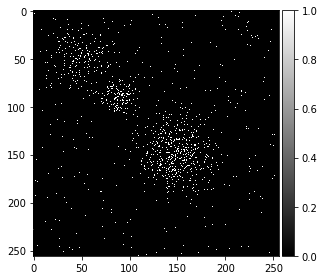

In [25]:
im3 = skimage.io.imread(files[4])
im3 = np.where(im3==255, 0, 1)
skimage.io.imshow(im3, cmap='gray')

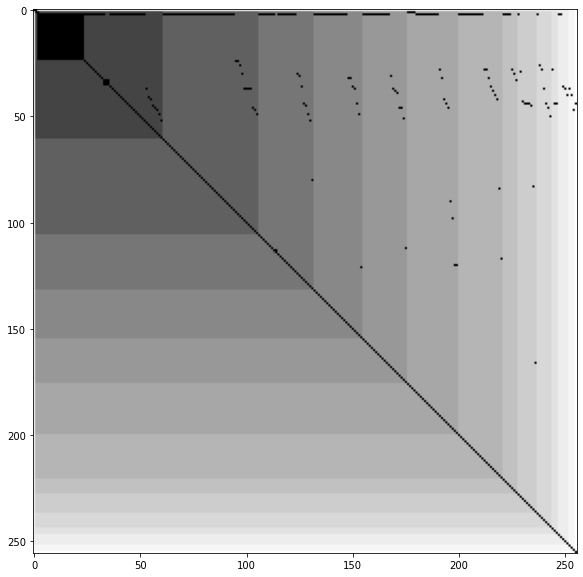

In [26]:
ivat(im3)

Spread out data is reflected by many squares in the map. Only three prominent ones represent the three clusters.

In [27]:
X = extract_points(im3)
#Apply fuzzy-c-means and get the membership matrix, centers of clusters and labels of each data point
u, centers, labels = apply_fcm(X)
print("Membership matrix for two clusters:")
u[0]


Membership matrix for two clusters:


array([[0.17480181, 0.82519819],
       [0.47878543, 0.52121457],
       [0.49440573, 0.50559427],
       ...,
       [0.79518445, 0.20481555],
       [0.75357914, 0.24642086],
       [0.73741886, 0.26258114]])

In [28]:
print("Partition Coefficient")
pc_values = []
for i in range(2,11):
    print(f"Partition coefficient with {i} number of clusters is: {pc(u[i-2])}")
    pc_values.append(pc(u[i-2]))
    
#The best cluster is the one that gives the highest PC.
index = pc_values.index([np.max(pc_values)])
print("Best number of clusters is {}".format(index+2))

Partition Coefficient
Partition coefficient with 2 number of clusters is: 0.8165266622800326
Partition coefficient with 3 number of clusters is: 0.6377678288636499
Partition coefficient with 4 number of clusters is: 0.6029892331293414
Partition coefficient with 5 number of clusters is: 0.5545594525044711
Partition coefficient with 6 number of clusters is: 0.5540494995038353
Partition coefficient with 7 number of clusters is: 0.5167728055639441
Partition coefficient with 8 number of clusters is: 0.5219375253680102
Partition coefficient with 9 number of clusters is: 0.4980444665177765
Partition coefficient with 10 number of clusters is: 0.45946226449335337
Best number of clusters is 2


In [29]:
print("Classification Entropy:")
ce_values = []
for i in range(2,11):
    print(f"Partition coefficient with {i} number of clusters is: {ce(u[i-2])}")
    ce_values.append(ce(u[i-2]))
#The best cluster is the one that gives the lowest CE
index = ce_values.index([np.min(ce_values)])
print("Best number of clusters is {}".format(index+2))

Classification Entropy:
Partition coefficient with 2 number of clusters is: 0.13293440654452818
Partition coefficient with 3 number of clusters is: 0.2716269676459675
Partition coefficient with 4 number of clusters is: 0.3204011710173644
Partition coefficient with 5 number of clusters is: 0.38346102966969475
Partition coefficient with 6 number of clusters is: 0.40114139910198676
Partition coefficient with 7 number of clusters is: 0.4441729069128522
Partition coefficient with 8 number of clusters is: 0.4501323494328908
Partition coefficient with 9 number of clusters is: 0.4853854160784649
Partition coefficient with 10 number of clusters is: 0.5289477242029681
Best number of clusters is 2


In [30]:
cs_per_clust = cs(X, centers, labels)
print("CS indices:")
for key,value in cs_per_clust.items():
    print(f"Partition coefficient with {key} number of clusters is: {value}")
#The best cluster is the one that gives the lowest CS indices.
print(f"Best number of clusters is {min(cs_per_clust, key=cs_per_clust.get)}")

CS indices:
Partition coefficient with 2 number of clusters is: 0.009624478224371513
Partition coefficient with 3 number of clusters is: 0.026489327595159564
Partition coefficient with 4 number of clusters is: 0.0622089900101838
Partition coefficient with 5 number of clusters is: 0.07999400197894234
Partition coefficient with 6 number of clusters is: 0.09515359900329307
Partition coefficient with 7 number of clusters is: 0.14011145465381455
Partition coefficient with 8 number of clusters is: 0.16348044068913561
Partition coefficient with 9 number of clusters is: 0.19919451996693144
Partition coefficient with 10 number of clusters is: 0.25331889308841204
Best number of clusters is 2


## Conclusion:

In all datasets, the three techniques suggested the same thing; 2 clusters are the best ones. This may be due to the fact that the clusters are not compact. Especially in the third image there is a lot of noise. In my opinion, in the second image if the clusters were a little more tightly packed, we might have gotten three clusters. 
2 cluster results align with ivat results as in all ivat maps we see one black square surrounded by a dark gray square.